In [2]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Visualization
from wordcloud import WordCloud
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
# Load the dataset
data = pd.read_csv('output.csv')

# Display dataset overview
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB
None
   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3 

In [4]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing data (if any)
data.dropna(inplace=True)


rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64


In [5]:
print(data.isnull().sum())

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64


In [6]:
# Text preprocessing function
nltk.download('punkt_tab')
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(tokens)

# Apply preprocessing to the reviews
data['cleaned_reviews'] = data['verified_reviews'].apply(preprocess_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [7]:
data.head()

,rating,date,variation,verified_reviews,feedback,cleaned_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes playing game answer question correct...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing 4 yr old learns dinosaur control...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music


In [8]:
# Encode feedback as binary labels
data['label'] = data['feedback'].apply(lambda x: 1 if x == 1 else 0)

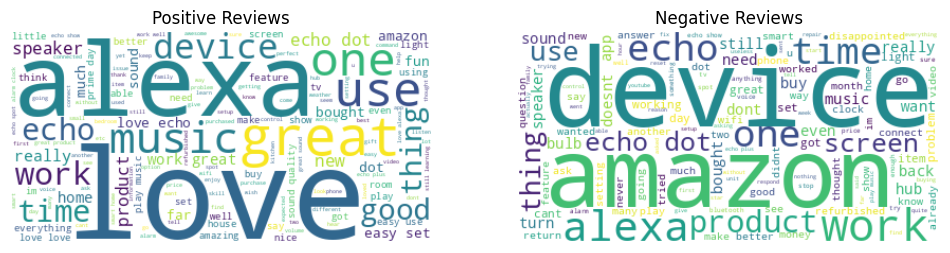

In [9]:
# Word cloud for positive and negative reviews
positive_reviews = ' '.join(data[data['feedback'] == 1]['cleaned_reviews'])
negative_reviews = ' '.join(data[data['feedback'] == 0]['cleaned_reviews'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Positive Reviews')
wordcloud_pos = WordCloud(background_color='white').generate(positive_reviews)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Negative Reviews')
wordcloud_neg = WordCloud(background_color='white').generate(negative_reviews)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data['cleaned_reviews'], data['label'], test_size=0.2, random_state=42)

In [11]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [12]:
# Train logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test_tfidf)
print('Logistic Regression Results:')
print(classification_report(y_test, y_pred_lr))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_lr))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.90      1.00      0.95       567

    accuracy                           0.90       630
   macro avg       0.45      0.50      0.47       630
weighted avg       0.81      0.90      0.85       630

Confusion Matrix:
 [[  0  63]
 [  0 567]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
# Check class distribution
print(data['label'].value_counts())

label
1    2893
0     256
Name: count, dtype: int64


In [14]:
from sklearn.utils import resample

# Separate classes
positive = data[data['label'] == 1]
negative = data[data['label'] == 0]

# Oversample the negative class to match the size of the positive class
negative_oversampled = resample(negative,
                                replace=True,
                                n_samples=len(positive),
                                random_state=42)

# Combine the datasets
balanced_data = pd.concat([positive, negative_oversampled])

# Check the new class distribution
print(balanced_data['label'].value_counts())


label
1    2893
0    2893
Name: count, dtype: int64


In [15]:
# Split balanced data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    balanced_data['cleaned_reviews'],
    balanced_data['label'],
    test_size=0.2,
    random_state=42)

# Vectorize the text
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Logistic Regression with class weighting
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = lr_model.predict(X_test_tfidf)
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       566
           1       1.00      0.92      0.96       592

    accuracy                           0.96      1158
   macro avg       0.96      0.96      0.96      1158
weighted avg       0.96      0.96      0.96      1158

Confusion Matrix:
 [[566   0]
 [ 46 546]]


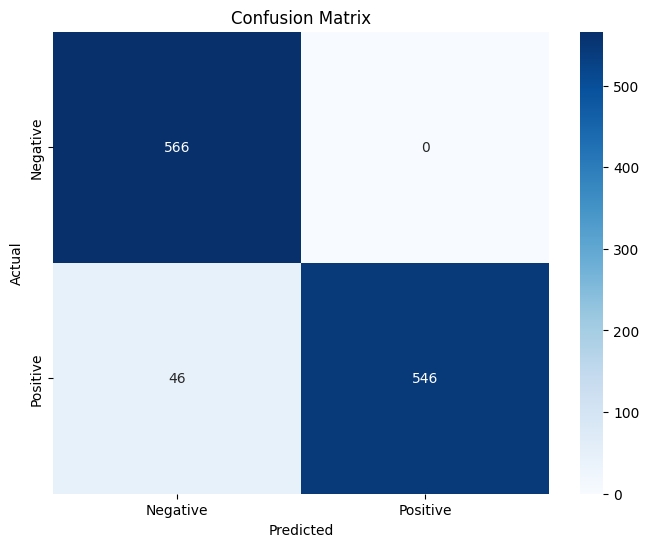

In [16]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Split balanced data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    balanced_data['cleaned_reviews'],
    balanced_data['label'],
    test_size=0.2,
    random_state=42)
# Vectorize the text
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf_2 = vectorizer.fit_transform(X_train)
X_test_tfidf_2 = vectorizer.transform(X_test)

lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train_tfidf_2, y_train)

# Predict and evaluate
y_pred = lr_model.predict(X_test_tfidf_2)
print('Classification Report of Downsampling data:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))  

In [17]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Convert TF-IDF features to a DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_tfidf, label=y_train)
dtest = xgb.DMatrix(X_test_tfidf, label=y_test)

# Set XGBoost parameters
params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss',       # Log-loss as evaluation metric
    'learning_rate': 0.1,           # Learning rate
    'max_depth': 6,                 # Depth of trees
    'scale_pos_weight': len(y_train[y_train == 0]) / len(y_train[y_train == 1]),  # Balance classes
    'seed': 42                      # Random seed for reproducibility
}

# Train the XGBoost model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Predict on the test set
y_pred_prob = xgb_model.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       566
           1       1.00      0.87      0.93       592

    accuracy                           0.93      1158
   macro avg       0.94      0.93      0.93      1158
weighted avg       0.94      0.93      0.93      1158

Confusion Matrix:
 [[566   0]
 [ 78 514]]


In [18]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Define parameter grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],   # Step size shrinkage
    'max_depth': [4, 6, 8],              # Depth of trees
    'n_estimators': [50, 100, 200],      # Number of trees (boosting rounds)
    'scale_pos_weight': [1, 2, 5]        # Class balancing parameter
}

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', seed=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='f1_weighted',   # Use F1 score as the evaluation metric
    cv=3,                   # 3-fold cross-validation
    verbose=1,              # Display progress
    n_jobs=-1               # Use all available cores
)

# Perform Grid Search
grid_search.fit(X_train_tfidf, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [4, 6, 8], 'n_estimators': [50, 100, 200],
                         'scale_pos_weight': [1, 2, 5]},
             scoring='f1_weighted', verbose=1)

In [19]:
# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Use the best model to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)

# Evaluate the performance of the best model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Parameters: {'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 200, 'scale_pos_weight': 1}
Best F1 Score: 0.9466705003703771
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       566
           1       1.00      0.94      0.97       592

    accuracy                           0.97      1158
   macro avg       0.97      0.97      0.97      1158
weighted avg       0.97      0.97      0.97      1158

Confusion Matrix:
 [[566   0]
 [ 37 555]]


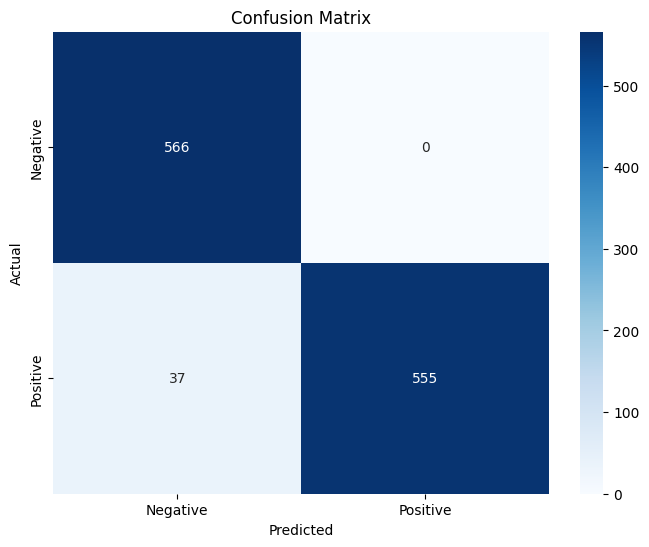

In [20]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:

from sklearn.ensemble import RandomForestClassifier


# Initialize and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced') # Example parameters
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
print("Random Forest Classifier Results:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier Results:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       566
           1       1.00      0.97      0.98       592

    accuracy                           0.98      1158
   macro avg       0.98      0.98      0.98      1158
weighted avg       0.98      0.98      0.98      1158

Confusion Matrix:
 [[566   0]
 [ 19 573]]


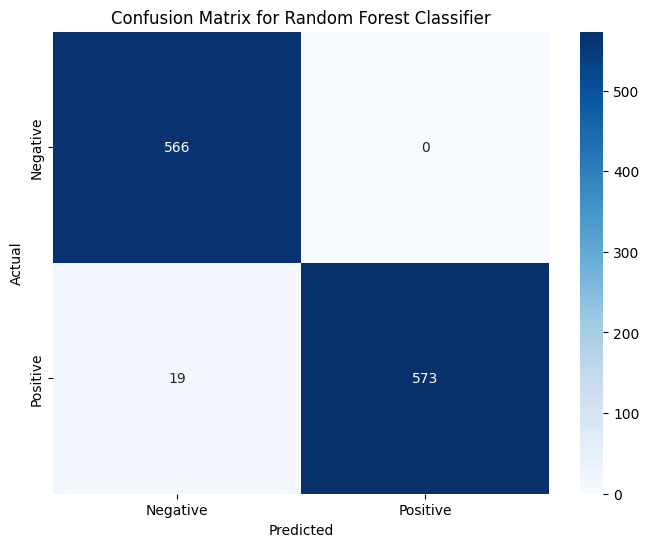

In [27]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()